In [1]:
# February 14st, 2020
# Script to examine foreign citations

In [2]:
import pandas as pd
import numpy as np
# import itertools
import seaborn as sns
# import networkx as nx
# import csv
# from graphviz import Digraph
# import igraph
import matplotlib.pyplot as plt
import matplotlib
# import datetime


# import sys
# sys.path.append('/home/rkogeyam/scripts/')
# sys.path.append('scripts/')

# from determinants_scripts import classes, dtypes

In [3]:
cit='data/foreigncitation.tsv.gz'
file=gzip.open(cit, 'r')
df=pd.read_csv(file, sep='\t', parse_dates=['date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27707774 entries, 0 to 27707773
Data columns (total 7 columns):
uuid         object
patent_id    object
date         object
number       object
country      object
category     object
sequence     int64
dtypes: int64(1), object(6)
memory usage: 1.4+ GB


In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
sns.set()

In [7]:
df.head()

,uuid,patent_id,date,number,country,category,sequence
0,00000kn29m6rw14dilp4huhqa,9872910,2013-04-01,2013-512894,JP,cited by applicant,4
1,00000mb3si9yta1mr1mzzf7t3,7580255,2001-05-01,1 104 150,EP,cited by other,0
2,00007x6v2g3mhkq0vq9o2k3g3,10221436,2007-12-01,WO-2007138178,WO,cited by applicant,84
3,00009vc2dthuhusv4ftd964dp,5928533,1990-07-01,2641718,FR,NaN,1
4,0000clmhnekrrt61zwmx9n0s1,7223854,1993-04-01,WO 93/07898,WO,cited by other,6


In [8]:
df['date']=pd.to_datetime(df['date'], errors='coerce')

In [9]:
df.shape

(27707774, 7)

In [10]:
df=df[df['date'].dt.year<2018]

In [11]:
df.shape

(27244294, 7)

In [12]:
df=df[df['date'].dt.year>1960]

In [13]:
df.shape

(26668079, 7)

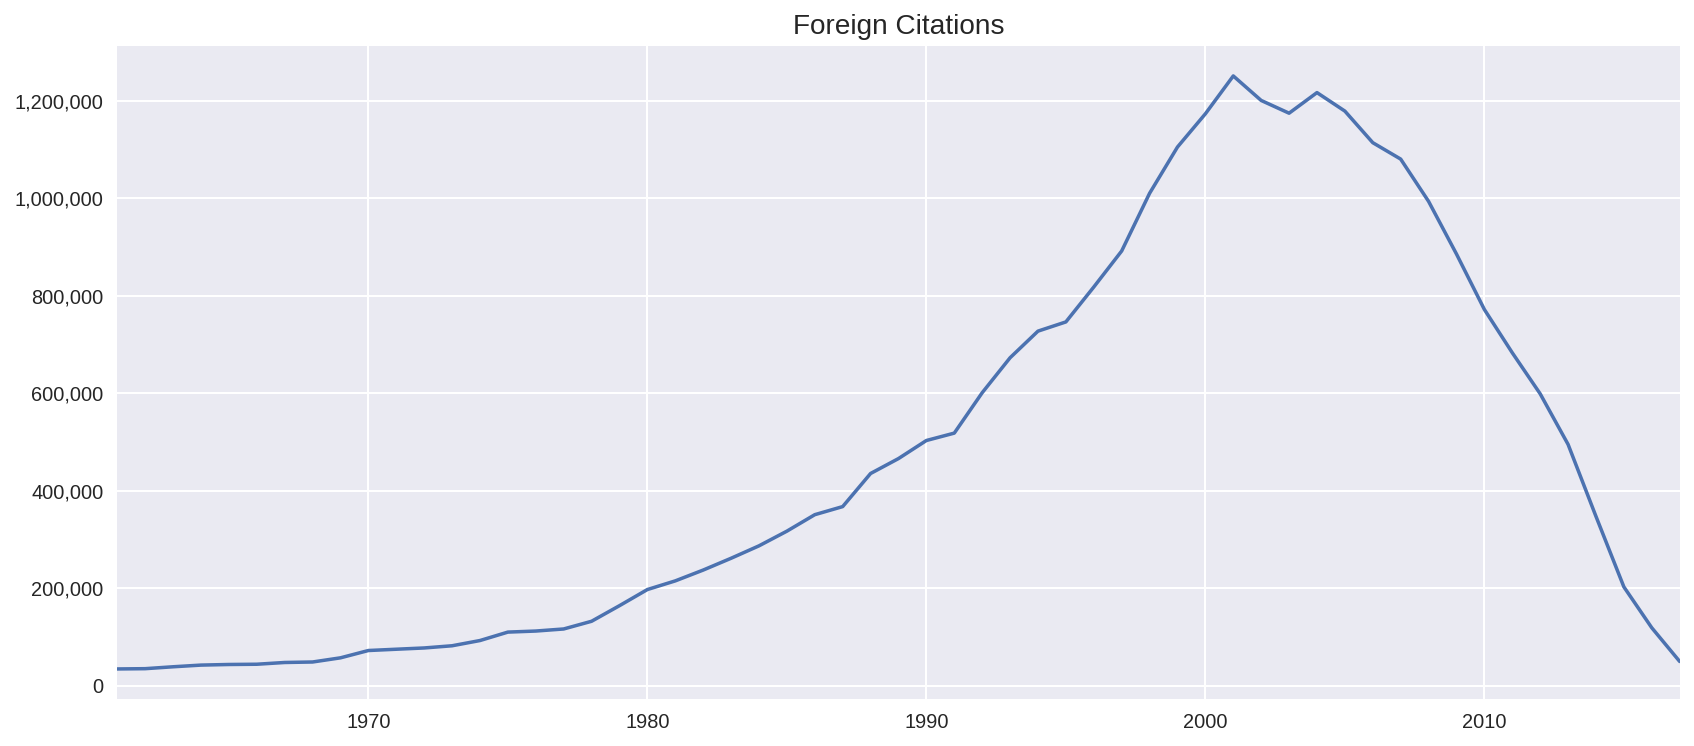

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))
ax=df.groupby(pd.Grouper(key='date', freq="A")).count().uuid.plot(ax=ax)
# ax = df.groupby('year').count().plot(y='uuid', ax=ax)
ax.set_title('Foreign Citations', fontsize=14)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.xaxis.label.set_visible(False)
